In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import os

## Lecture et concaténation de tous les fichiers 

In [2]:
allfiles = os.listdir('./data/data valid/')
li = []

for file in allfiles : 
    print(file)
    file = './data/data valid/' + file 
    if file[-3:] == 'csv':
        data = pd.read_csv(file, header=0, sep=';')
        data['JOUR'] = pd.to_datetime(data['JOUR'])
        li.append(data)
    else:
        data = pd.read_csv(file, header=0, sep='\t')
        data['JOUR'] = pd.to_datetime(data['JOUR'])
        li.append(data)

dt = pd.concat(li, axis=0, ignore_index=True)

2015S2_NB_FER.csv
2018S1_NB_FER.txt
2017S2_NB_FER.txt
2016S2_NB_FER.txt
validations-sur-le-reseau-ferre-nombre-de-validations-par-jour-1er-semestre-2019.csv
2016S1_NB_FER.txt
2017S1_NB_FER.txt
2015S1_NB_FER.csv


## Modification des types 

In [3]:
dt.head()

JOUR  CODE_STIF_TRNS CODE_STIF_RES CODE_STIF_ARRET  LIBELLE_ARRET  \
0 2015-01-07             100           110               1  PORTE MAILLOT   
1 2015-01-07             100           110               1  PORTE MAILLOT   
2 2015-01-07             100           110               1  PORTE MAILLOT   
3 2015-01-07             100           110               1  PORTE MAILLOT   
4 2015-01-07             100           110               1  PORTE MAILLOT   

  ID_REFA_LDA CATEGORIE_TITRE NB_VALD  
0       71379       AMETHYSTE     241  
1       71379     AUTRE TITRE     215  
2       71379             FGT     518  
3       71379       IMAGINE R    2556  
4       71379          NAVIGO   14463

In [4]:
dt

JOUR  CODE_STIF_TRNS CODE_STIF_RES CODE_STIF_ARRET  \
0       2015-01-07             100           110               1   
1       2015-01-07             100           110               1   
2       2015-01-07             100           110               1   
3       2015-01-07             100           110               1   
4       2015-01-07             100           110               1   
...            ...             ...           ...             ...   
6300964 2015-06-30             810           802             905   
6300965 2015-06-30             810           802             905   
6300966 2015-06-30             810           802             905   
6300967 2015-06-30             810           802             905   
6300968 2015-06-30             810           802             905   

         LIBELLE_ARRET ID_REFA_LDA CATEGORIE_TITRE NB_VALD  
0        PORTE MAILLOT       71379       AMETHYSTE     241  
1        PORTE MAILLOT       71379     AUTRE TITRE     215  
2        PORTE MAILLOT       71379             FGT     518  
3        PORTE MAILLOT       71379       IMAGINE R    2556  
4        PORTE MAILLOT       71379          NAVIGO   14463  
...                ...         ...             ...     ...  
6300964     VILLEPINTE       73547     AUTRE TITRE      49  
6300965     VILLEPINTE       73547             FGT     279  
6300966     VILLEPINTE       73547       IMAGINE R     308  
6300967     VILLEPINTE       73547          NAVIGO    1388  
6300968     VILLEPINTE       73547             TST     347  

[6300969 rows x 8 columns]

#### 8% des données ont la valeur "moins de 5" 

In [5]:
dt.loc[dt['NB_VALD'] == 'Moins de 5'].shape[0]/dt.shape[0]*100

9.450435321932229

In [6]:
dt.loc[dt['NB_VALD'] == 'Moins de 5', 'NB_VALD'] = 5
dt['NB_VALD'] = pd.to_numeric(dt['NB_VALD'])

In [7]:
dt['JOUR'] = dt['JOUR'].astype(str)

In [8]:
dt.dtypes

JOUR               object
CODE_STIF_TRNS      int64
CODE_STIF_RES      object
CODE_STIF_ARRET    object
LIBELLE_ARRET      object
ID_REFA_LDA        object
CATEGORIE_TITRE    object
NB_VALD             int64
dtype: object

In [9]:
dt_agg = pd.DataFrame(dt.groupby(["JOUR","LIBELLE_ARRET"])['NB_VALD'].sum().reset_index())

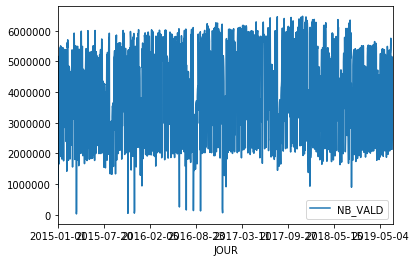

In [10]:
dt_agg.groupby('JOUR').sum().plot()

In [11]:
dt_agg

JOUR                 LIBELLE_ARRET  NB_VALD
0        2015-01-01                      ABBESSES      750
1        2015-01-01                         ABLON      118
2        2015-01-01         ACHERES-GRAND-CORMIER       18
3        2015-01-01                 ACHERES-VILLE      482
4        2015-01-01  AEROPORT CHARLES DE GAULLE 1     1257
...             ...                           ...      ...
1026013  2019-06-30          VOLTAIRE (LEON BLUM)     6306
1026014  2019-06-30                        VOSVES       10
1026015  2019-06-30   VULAINES-SUR-SEINE-SAMOREAU       20
1026016  2019-06-30                        WAGRAM     1840
1026017  2019-06-30                        YERRES     1622

[1026018 rows x 3 columns]

In [12]:
dt_agg.shape

(1026018, 3)

In [13]:
dt_agg.to_csv('./data/validation_data_agg_2015_2019.csv')

## Merge positions

In [14]:
pos = pd.read_csv("../positions-geographiques-des-stations-du-reseau-ratp.csv", sep=';')
dt2 = pos[['Name','Coordinates']].copy()

l = np.array(dt2["Coordinates"].str.split(",").tolist())
dt2["lon"] = l[:,0]
dt2["lat"] = l[:,1]
dt2.drop("Coordinates",axis=1, inplace=True)
#dt2["lon"] = dt2["lon"].str[0:6]
#dt2["lat"] = dt2["lat"].str[0:6]

#dt2.rename(columns={'Name':'LIBELLE_ARRET'}, inplace=True)
dt2['Name'] = dt2['Name'].str.lower()
dt2['Name'] = dt2['Name'].str.replace('[^\w]','')
dt2['Name'] = dt2['Name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

dt2['lon'] = pd.to_numeric(dt2["lon"])
dt2['lat'] = pd.to_numeric(dt2["lat"])

dt2 = dt2.groupby('Name').mean().reset_index()
dt2.drop_duplicates(inplace=True)

dt2.head()

Name        lon       lat
0                       11novembre  48.849993  2.395659
1                   11novembre1918  48.824212  2.516243
2  11novembrecourcellesuryvetterer  48.700031  2.099321
3                    12fevrier1934  48.817827  2.308055
4                    17octobre1961  48.898062  2.216702

In [15]:
dt_agg['Name'] = dt_agg['LIBELLE_ARRET'].str.lower()
dt_agg['Name'] = dt_agg['Name'].str.replace('[^\w]','')
dt_agg['Name'] = dt_agg['Name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')


In [16]:
dt_agg_pos = dt_agg.merge(dt2, how='left', on='Name')
dt_agg_pos.drop('Name',axis=1,inplace=True)
dt_agg_pos.head()

JOUR                 LIBELLE_ARRET  NB_VALD        lon       lat
0  2015-01-01                      ABBESSES      750  48.884505  2.338365
1  2015-01-01                         ABLON      118        NaN       NaN
2  2015-01-01         ACHERES-GRAND-CORMIER       18  48.955388  2.092457
3  2015-01-01                 ACHERES-VILLE      482  48.970248  2.077672
4  2015-01-01  AEROPORT CHARLES DE GAULLE 1     1257  49.010400  2.561357

## correspondances 

In [17]:
corres = pd.read_csv('data/correspondances.csv') 

In [18]:
corres.head()

stop_name line    rer
0  Louis Blanc   7b  False
1      Bolivar   7b  False
2       Jaurès   7b  False
3       Danube   7b  False
4     Botzaris   7b  False

In [19]:
corr = corres.groupby('stop_name').agg({
    'rer' : sum,
    'line' : pd.Series.nunique
}).reset_index().rename(columns={'rer':'nb_rer','line':'nb_metro'})
corr['nb_metro'] = corr['nb_metro'] - corr['nb_rer']

corr.head()

stop_name  nb_rer  nb_metro
0               Abbesses     0.0       1.0
1  Achères Grand Cormier     1.0       0.0
2          Achères-Ville     1.0       0.0
3        Alexandre-Dumas     0.0       1.0
4           Alma-Marceau     0.0       1.0

In [65]:
corr['Name'] = corr['stop_name'].str.lower()
corr['Name'] = corr['Name'].str.replace('[^\w]','')
corr['Name'] = corr['Name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

dt_agg_pos['Name'] = dt_agg_pos['LIBELLE_ARRET'].str.lower()
dt_agg_pos['Name'] = dt_agg_pos['Name'].str.replace('[^\w]','')
dt_agg_pos['Name'] = dt_agg_pos['Name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

dt_agg_pos_corr = dt_agg_pos.merge(corr, how='left', on='Name')
dt_agg_pos_corr.drop(['Name','stop_name'],axis=1,inplace=True)
dt_agg_pos_corr.head()

JOUR                 LIBELLE_ARRET  NB_VALD        lon       lat  \
0  2015-01-01                      ABBESSES      750  48.884505  2.338365   
1  2015-01-01                         ABLON      118        NaN       NaN   
2  2015-01-01         ACHERES-GRAND-CORMIER       18  48.955388  2.092457   
3  2015-01-01                 ACHERES-VILLE      482  48.970248  2.077672   
4  2015-01-01  AEROPORT CHARLES DE GAULLE 1     1257  49.010400  2.561357   

   nb_rer  nb_metro  
0     0.0       1.0  
1     NaN       NaN  
2     1.0       0.0  
3     1.0       0.0  
4     1.0       0.0

## Incidents

In [66]:
inc = pd.read_csv('./data/incidents_2016_2019_clean.csv')
inc['day'] = inc['date'].str[:10]
inc['duree'] = pd.to_timedelta(inc['duree'])
inc.head()

duree                 date line_num line_type                what  \
0 00:00:00  2016-07-01 10:34:00       12     metro          pedestrian   
1 00:00:00  2016-07-01 10:42:00       12     metro          pedestrian   
2 00:00:00  2016-07-01 11:30:00       12     metro          pedestrian   
3 00:37:00  2016-07-01 12:57:00        6     metro  unattended_luggage   
4 00:10:00  2016-07-01 13:35:00        6     metro  unattended_luggage   

      type_inc         day  
0  unscheduled  2016-07-01  
1  unscheduled  2016-07-01  
2  unscheduled  2016-07-01  
3  unscheduled  2016-07-01  
4  unscheduled  2016-07-01

In [67]:
inc_group = inc.groupby(['day','line_num']).agg({
    'duree' : sum,
    'what' : 'first',
    'type_inc' : 'count'
}).reset_index().rename(columns={'type_inc':'num_inc','what':'type_inc'})
inc_group['day'] = pd.to_datetime(inc_group['day'])

inc_group.head()

day line_num    duree   type_inc  num_inc
0 2016-05-01        1 00:00:00    generic        2
1 2016-05-01       11 00:00:00      smoke        1
2 2016-05-01       13 00:26:00  breakdown        4
3 2016-05-01        2 00:00:00  breakdown        3
4 2016-05-01        7 00:00:00  breakdown        2

In [68]:
inc_station = inc_group.merge(corres, how='left',left_on='line_num',right_on='line').drop(['line','rer'],axis=1)

inc_station.head()

day line_num  duree type_inc  num_inc      stop_name
0 2016-05-01        1 0 days  generic        2         Nation
1 2016-05-01        1 0 days  generic        2       Concorde
2 2016-05-01        1 0 days  generic        2       Bastille
3 2016-05-01        1 0 days  generic        2  Louvre-Rivoli
4 2016-05-01        1 0 days  generic        2        Bérault

In [69]:
dt_agg_pos_corr.head()

JOUR                 LIBELLE_ARRET  NB_VALD        lon       lat  \
0  2015-01-01                      ABBESSES      750  48.884505  2.338365   
1  2015-01-01                         ABLON      118        NaN       NaN   
2  2015-01-01         ACHERES-GRAND-CORMIER       18  48.955388  2.092457   
3  2015-01-01                 ACHERES-VILLE      482  48.970248  2.077672   
4  2015-01-01  AEROPORT CHARLES DE GAULLE 1     1257  49.010400  2.561357   

   nb_rer  nb_metro  
0     0.0       1.0  
1     NaN       NaN  
2     1.0       0.0  
3     1.0       0.0  
4     1.0       0.0

In [70]:
inc_station['Name'] = inc_station['stop_name'].str.lower()
inc_station['Name'] = inc_station['Name'].str.replace('[^\w]','')
inc_station['Name'] = inc_station['Name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

inc_station['day'] = inc_station['day'].astype(str)

curr_dt = dt_agg_pos_corr.copy()

curr_dt['Name'] = curr_dt['LIBELLE_ARRET'].str.lower()
curr_dt['Name'] = curr_dt['Name'].str.replace('[^\w]','')
curr_dt['Name'] = curr_dt['Name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

curr_dt['JOUR'] = curr_dt['JOUR'].astype(str)

In [76]:
dt_pos_cor_inc = curr_dt.merge(inc_station, how='left',left_on=['JOUR','Name'], right_on=['day','Name'])
dt_pos_cor_inc.drop(['Name','day','line_num','stop_name'],axis=1,inplace=True)

dt_pos_cor_inc.head()

JOUR                 LIBELLE_ARRET  NB_VALD        lon       lat  \
0  2015-01-01                      ABBESSES      750  48.884505  2.338365   
1  2015-01-01                         ABLON      118        NaN       NaN   
2  2015-01-01         ACHERES-GRAND-CORMIER       18  48.955388  2.092457   
3  2015-01-01                 ACHERES-VILLE      482  48.970248  2.077672   
4  2015-01-01  AEROPORT CHARLES DE GAULLE 1     1257  49.010400  2.561357   

   nb_rer  nb_metro duree type_inc  num_inc  
0     0.0       1.0   NaT      NaN      NaN  
1     NaN       NaN   NaT      NaN      NaN  
2     1.0       0.0   NaT      NaN      NaN  
3     1.0       0.0   NaT      NaN      NaN  
4     1.0       0.0   NaT      NaN      NaN

In [77]:
dt_pos_cor_inc.loc[dt_pos_cor_inc['num_inc'].notna()]

JOUR    LIBELLE_ARRET  NB_VALD        lon       lat  nb_rer  \
346100   2016-05-01  ALEXANDRE DUMAS    10584  48.872031  2.416374     0.0   
346107   2016-05-01           ANVERS     9382  48.882872  2.344164     0.0   
346110   2016-05-01        ARGENTINE     8038  48.875693  2.289097     0.0   
346112   2016-05-01  ARTS ET METIERS     9540  48.865562  2.356510     0.0   
346126   2016-05-01            AVRON     5099  48.850355  2.465669     0.0   
...             ...              ...      ...        ...       ...     ...   
1036155  2019-06-30          RASPAIL     1511  48.776791  2.349999     0.0   
1036190  2019-06-30    SAINT-JACQUES     1999  48.832992  2.336683     0.0   
1036217  2019-06-30     SARTROUVILLE     5800  48.937512  2.157311     1.0   
1036228  2019-06-30  SEVRES-LECOURBE     2192  48.844854  2.310300     0.0   
1036253  2019-06-30        TROCADERO    10342  48.863420  2.287736     0.0   

         nb_metro    duree   type_inc  num_inc  
346100        1.0 00:00:00  breakdown      3.0  
346107        1.0 00:00:00  breakdown      3.0  
346110        1.0 00:00:00    generic      2.0  
346112        2.0 00:00:00      smoke      1.0  
346126        1.0 00:00:00  breakdown      3.0  
...           ...      ...        ...      ...  
1036155       2.0 05:45:00  passenger     12.0  
1036190       1.0 05:45:00  passenger     12.0  
1036217       0.0 00:20:00  breakdown     16.0  
1036228       1.0 05:45:00  passenger     12.0  
1036253       2.0 05:45:00  passenger     12.0  

[130438 rows x 10 columns]

## Jours fériés

In [79]:
data_ferie = pd.read_csv("./data/jours-feries.csv")
data_ferie.head()

date  est_jour_ferie nom_jour_ferie
0  1950-01-01            True   Jour de l'an
1  1950-01-02           False            NaN
2  1950-01-03           False            NaN
3  1950-01-04           False            NaN
4  1950-01-05           False            NaN

In [80]:
# Let's convert dates into datetime type
data_ferie['date'] = pd.to_datetime(data_ferie['date'],format="%Y/%m/%d")
# Let's keep only dates between 2015-01-01 and 2019-06-30
data_ferie=data_ferie[data_ferie['date'].isin(pd.date_range(start='20150101', end='20190630'))]
# Let's replace NaN values by "jour non ferie"
data_ferie["nom_jour_ferie"].fillna("Jour non ferie", inplace = True)


In [81]:
data_ferie.columns = ['date','est_jour_ferie','type_jour']
data_ferie.head()

date  est_jour_ferie       type_jour
23741 2015-01-01            True    Jour de l'an
23742 2015-01-02           False  Jour non ferie
23743 2015-01-03           False  Jour non ferie
23744 2015-01-04           False  Jour non ferie
23745 2015-01-05           False  Jour non ferie

In [82]:
# Encoder la colonne 'est_jour_ferié' : True => 1 et False => 0
data_ferie.est_jour_ferie = data_ferie.est_jour_ferie.astype(int)
data_ferie.head()

date  est_jour_ferie       type_jour
23741 2015-01-01               1    Jour de l'an
23742 2015-01-02               0  Jour non ferie
23743 2015-01-03               0  Jour non ferie
23744 2015-01-04               0  Jour non ferie
23745 2015-01-05               0  Jour non ferie

In [83]:
data_ferie['is_weekend'] = data_ferie['date'].map(lambda x : 1 if x.weekday() >= 5 else 0 )
data_ferie.head()

date  est_jour_ferie       type_jour  is_weekend
23741 2015-01-01               1    Jour de l'an           0
23742 2015-01-02               0  Jour non ferie           0
23743 2015-01-03               0  Jour non ferie           1
23744 2015-01-04               0  Jour non ferie           1
23745 2015-01-05               0  Jour non ferie           0

In [85]:
#Ajouter le type "Weekend" pour la colonne "type_jour"
mask = (data_ferie['is_weekend'] == 1) 
data_ferie['type_jour'][mask] = "Weekend"
data_ferie.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


date  est_jour_ferie       type_jour  is_weekend
23741 2015-01-01               1    Jour de l'an           0
23742 2015-01-02               0  Jour non ferie           0
23743 2015-01-03               0         Weekend           1
23744 2015-01-04               0         Weekend           1
23745 2015-01-05               0  Jour non ferie           0

In [86]:
data_ferie.drop('is_weekend',axis=1,inplace=True)
data_ferie.head()

date  est_jour_ferie       type_jour
23741 2015-01-01               1    Jour de l'an
23742 2015-01-02               0  Jour non ferie
23743 2015-01-03               0         Weekend
23744 2015-01-04               0         Weekend
23745 2015-01-05               0  Jour non ferie

In [87]:
curr_dt = dt_pos_cor_inc.copy()

curr_dt['JOUR'] = pd.to_datetime(curr_dt['JOUR'])
df_merged = pd.merge(curr_dt, data_ferie, left_on='JOUR',right_on='date',how='left')

In [89]:
df_merged.drop('date',axis=1,inplace=True)

In [90]:
df_merged

JOUR                 LIBELLE_ARRET  NB_VALD        lon  \
0       2015-01-01                      ABBESSES      750  48.884505   
1       2015-01-01                         ABLON      118        NaN   
2       2015-01-01         ACHERES-GRAND-CORMIER       18  48.955388   
3       2015-01-01                 ACHERES-VILLE      482  48.970248   
4       2015-01-01  AEROPORT CHARLES DE GAULLE 1     1257  49.010400   
...            ...                           ...      ...        ...   
1036301 2019-06-30          VOLTAIRE (LEON BLUM)     6306  48.857966   
1036302 2019-06-30                        VOSVES       10        NaN   
1036303 2019-06-30   VULAINES-SUR-SEINE-SAMOREAU       20        NaN   
1036304 2019-06-30                        WAGRAM     1840  48.883712   
1036305 2019-06-30                        YERRES     1622        NaN   

              lat  nb_rer  nb_metro duree type_inc  num_inc  est_jour_ferie  \
0        2.338365     0.0       1.0   NaT      NaN      NaN               1   
1             NaN     NaN       NaN   NaT      NaN      NaN               1   
2        2.092457     1.0       0.0   NaT      NaN      NaN               1   
3        2.077672     1.0       0.0   NaT      NaN      NaN               1   
4        2.561357     1.0       0.0   NaT      NaN      NaN               1   
...           ...     ...       ...   ...      ...      ...             ...   
1036301  2.380567     0.0       1.0   NaT      NaN      NaN               0   
1036302       NaN     NaN       NaN   NaT      NaN      NaN               0   
1036303       NaN     NaN       NaN   NaT      NaN      NaN               0   
1036304  2.305558     0.0       1.0   NaT      NaN      NaN               0   
1036305       NaN     NaN       NaN   NaT      NaN      NaN               0   

            type_jour  
0        Jour de l'an  
1        Jour de l'an  
2        Jour de l'an  
3        Jour de l'an  
4        Jour de l'an  
...               ...  
1036301       Weekend  
1036302       Weekend  
1036303       Weekend  
1036304       Weekend  
1036305       Weekend  

[1036306 rows x 12 columns]